2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


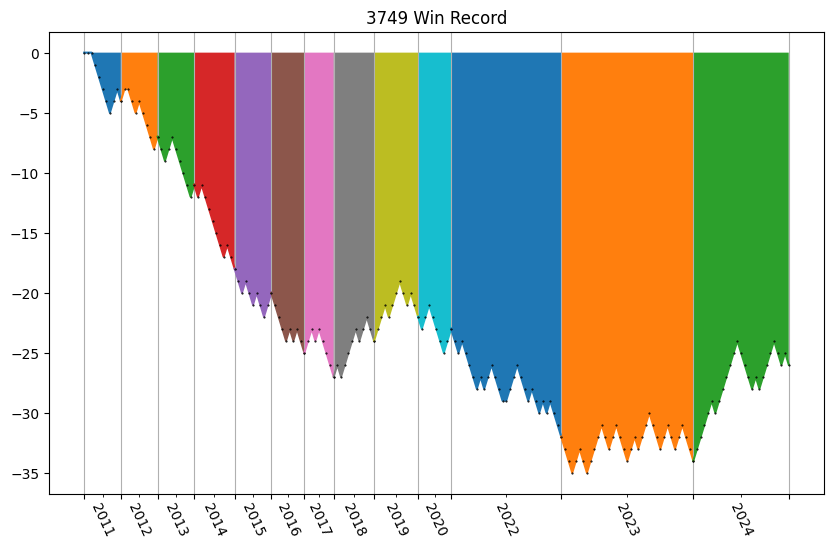

In [1]:
import tbapy
import matplotlib.pyplot as plt

tba = tbapy.TBA('gl4GXuoqG8anLUrLo356LIeeQZk15cfSoXF72YT3mYkI38cCoAmReoCSSF4XWccQ')
COMP_LEVEL = {'qm': 0, 'of': 1, 'qf': 2, 'sf': 3, 'f': 4}

# Enter Team Number Here:
team = 'frc3749'

# Change Graph Length & Width Here:
plt.figure(figsize=(10,6))

# Get the team's events
events = tba.team_events(team, simple=True)
events = filter(lambda event: event.event_type <= 5, events)
events = sorted(events, key=lambda event: event.start_date)

# Get the team's matches
wins = {}
for i, event in enumerate(events):
    if wins == {}: wins[event.year] = [0]
    if event.year not in wins: 
        wins[event.year] = [wins[events[i-1].year][-1]]
        print(event.year)
    
    matches = tba.team_matches(team, event.key, simple=True)
    matches = sorted(matches, key=lambda match: (COMP_LEVEL[match.comp_level], match.set_number, match.match_number))
    for match in matches:
        team_alliance = ''
        if team in match.alliances['blue']['team_keys']: team_alliance = 'blue'
        elif team in match.alliances['red']['team_keys']: team_alliance = 'red'
        else: continue

        if event.year != 2015:
            if match.winning_alliance == team_alliance:
                wins[event.year].append(wins[event.year][-1] + 1)
            elif match.winning_alliance == '':
                wins[event.year].append(wins[event.year][-1])
            else:
                wins[event.year].append(wins[event.year][-1] - 1)
        else:
            if match.alliances[team_alliance]["score"] > match.alliances[[x for x in ["red", "blue"] if x!=team_alliance][0]]["score"]:
                wins[event.year].append(wins[event.year][-1] + 1)
            elif match.alliances[team_alliance]["score"] == match.alliances[[x for x in ["red", "blue"] if x!=team_alliance][0]]["score"]:
                wins[event.year].append(wins[event.year][-1])
            else:
                wins[event.year].append(wins[event.year][-1] - 1)
                
# Plot the data
ax = plt.axes()
x = [0]
tick_locs = [0]
tick_labels = []
for year, data in wins.items():
    if len(data) <= 1: continue
    x = list(range(x[-1], x[-1] + len(wins[year])))
    tick_labels.append(year)
    tick_locs.append(tick_locs[-1] + len(data) - 1)
    plt.fill_between(x, data)

    # Style of Graph:

    # Bolded Black Line
    #plt.plot(x, data, color='black', linewidth=1)

    # Points for each Match
    plt.plot(x,data,marker='.', markersize=1, markeredgecolor='black', markerfacecolor='black')

ax.set_xticks(tick_locs)
ax.set_xticklabels('')
ax.set_xticks([(tick_locs[i] + loc)/2 for i, loc in enumerate(tick_locs[1:])] , minor=True)
ax.set_xticklabels(tick_labels , rotation =-65, minor=True)
plt.title(str(team[3:]) + ' Win Record')
plt.grid(axis='x')